In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from scipy.stats import boxcox, yeojohnson
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

from PIL import Image
import cv2
import os

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [3]:
# Read the dataset
ROOT_DATASET_DIR = "../isic-2024-challenge"
image_path=os.path.join(ROOT_DATASET_DIR,"train-image","image")
file_name = os.path.join(ROOT_DATASET_DIR,"train-metadata.csv")
df_raw = pd.read_csv(file_name)

In [4]:
# Analyze de features
df_raw.head(5)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


55 features in total.

In [5]:
stats = df_raw.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
target,401059.0,0.000980,0.031288,0.000000e+00,0.000000,0.000000,0.000000,1.000000
age_approx,398261.0,58.012986,13.596165,5.000000e+00,50.000000,60.000000,70.000000,85.000000
clin_size_long_diam_mm,401059.0,3.930827,1.743068,1.000000e+00,2.840000,3.370000,4.380000,28.400000
tbp_lv_A,401059.0,19.974007,3.999489,-2.487115e+00,17.330821,19.801910,22.304628,48.189610
tbp_lv_Aext,401059.0,14.919247,3.529384,-9.080269e+00,12.469740,14.713930,17.137175,37.021680
tbp_lv_B,401059.0,28.281706,5.278676,-7.309895e-01,24.704372,28.171570,31.637429,54.306900
tbp_lv_Bext,401059.0,26.913015,4.482994,9.237066e+00,23.848125,26.701704,29.679913,48.372700
tbp_lv_C,401059.0,34.786341,5.708469,3.054228e+00,31.003148,34.822580,38.430298,58.765170
tbp_lv_Cext,401059.0,30.921279,4.829345,1.184652e+01,27.658285,30.804893,33.963868,54.305290
tbp_lv_H,401059.0,54.653689,5.520849,-1.574164e+00,51.566273,55.035632,58.298184,105.875784


All images labeled as malign have a lesson_id, iddx_1, iddx_2, iddx_3. Half of them has iddx_4 (to be confirmed)

In [6]:
NumSamples = df_raw.shape[0]
NumFeatures = df_raw.shape[1]
print(f"Number of samples: {NumSamples}")
print(f"Number of features: {NumFeatures}")

Number of samples: 401059
Number of features: 55


### Columns included in train-metadata
| Feature | Description | To Be Removed | Comments |
| ----- | ----- | ----- | ----- | 
|``target``| Binary class {0: benign, 1: malignant}.| No | **Classification label** |
|``lesion_id``| Unique lesion identifier. Present in lesions that were manually tagged as a lesion of interest.| **Yes** | |
|``iddx_full``|	Fully classified lesion diagnosis.| **Yes** | |
|``iddx_1``| First level lesion diagnosis.| **Yes** | |
|``iddx_2``| Second level lesion diagnosis.| **Yes** | |
|``iddx_3``| Third level lesion diagnosis.| **Yes** | |
|``iddx_4``| Fourth level lesion diagnosis.| **Yes** | |
|``iddx_5``| Fifth level lesion diagnosis.| **Yes** | |
|``mel_mitotic_index``|	Mitotic index of invasive malignant melanomas.| **Yes** | |
|``mel_thick_mm``|	Thickness in depth of melanoma invasion.| **Yes** | |
|``tbp_lv_dnn_lesion_confidence``|	Lesion confidence score (0-100 scale).+| **Yes** | |

### Columns included in both training and test-metadata
| Feature | Description | To Be Removed | Comments |
| ----- | ----- | ----- | ----- | 
|``isic_id``| Unique case identifier. | **Yes\*** | **\*Image file name, to be removed after EDA** |
|``patient_id``| Unique patient identifier. | **Yes** | |
|``age_approx``| Approximate age of patient at time of imaging. | No | **Numerical - to be converted to Categorial?** |
|``sex``| Sex of the person. | No | **Convert to boolean** |
|``anatom_site_general``| Location of the lesion on the patient's body.  | No | **5-label categorical - OneHotEnc?** |
|``clin_size_long_diam_mm``| Maximum diameter of the lesion (mm).+  | No | **Numerical, check out histogram, maybe it is skewed** |
|``image_type``| Structured field of the ISIC Archive for image type.  | **Yes** | |
|``tbp_tile_type``|	Lighting modality of the 3D TBP source image. | No | **Convert to boolean** | 
|``tbp_lv_A``| A inside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_Aex``| A outside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_B``| B inside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_Bext``| B outside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_C``| Chroma inside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_Cext``| Chroma outside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_H``| Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown).+ | No | **Numerical, check out histogram** |
|``tbp_lv_Hext``| Hue outside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_L``| L inside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_Lext``| L outside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_areaMM2``| Area of lesion (mm^2).+ | No | **Numerical, check out histogram** |
|``tbp_lv_area_perim_ratio``|	Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10.+ | No | **Numerical, check out histogram** |
|``tbp_lv_color_std_mean``|	Color irregularity, calculated as the variance of colors within the lesion's boundary. | No | **Numerical, check out histogram** |
|``tbp_lv_deltaA``|	Average A contrast (inside vs. outside lesion).+ | No | **Numerical, check out histogram** |
|``tbp_lv_deltaB``|	Average B contrast (inside vs. outside lesion).+ | No | **Numerical, check out histogram** |
|``tbp_lv_deltaL``|	Average L contrast (inside vs. outside lesion).+ | No | **Numerical, check out histogram** |
|``tbp_lv_deltaLBnorm``| Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment. Calculated as the average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25.+ | No | **Numerical, check out histogram** |
|``tbp_lv_eccentricity``| Eccentricity.+ | No | **Numerical, check out histogram** |
|``tbp_lv_location``| Classification of anatomical location, divides arms & legs to upper & lower; torso into thirds.+ | No | **20 (+1 unknown)-label categorical, check out correlation with the target, if so then OneHotEnc** |
|``tbp_lv_location_simple``| Classification of anatomical location, simple.+ | No |**7 (+1 unknown)-label categorical, check out correlation with target, if so then OneHotEnc** |
|``tbp_lv_minorAxisMM``| Smallest lesion diameter (mm).+ | No | **Numerical, check out histogram** |
|``tbp_lv_nevi_confidence``| Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist.+,++ | No | **Numerical, check out histogram, scale from 0 to 1** |
|``tbp_lv_norm_border``| Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry.+ | No | **Numerical, check out histogram, scale from 0 to 1** |
|``tbp_lv_norm_color``|	Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity.+ | No | **Numerical, check out histogram, scale from 0 to 1** |
|``tbp_lv_perimeterMM``| Perimeter of lesion (mm).+ | No | **Numerical, check out histogram** |
|``tbp_lv_radial_color_std_max``| Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10. **Wrong: values exceed 10**+ | No | **Numerical, check out histogram** |
|``tbp_lv_stdL``| Standard deviation of L inside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_stdLExt``| Standard deviation of L outside lesion.+ | No | **Numerical, check out histogram** |
|``tbp_lv_symm_2axis``|	Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10.+ **Wrong: values range 0-1** | No | **Numerical, check out histogram** |
|``tbp_lv_symm_2axis_angle``|	Lesion border asymmetry angle.+ | No | **Numerical, check out histogram** |
|``tbp_lv_x``|	X-coordinate of the lesion on 3D TBP.+ | No | **Numerical, check out histogram** |
|``tbp_lv_y``|	Y-coordinate of the lesion on 3D TBP.+ | No | **Numerical, check out histogram** |
|``tbp_lv_z	``| Z-coordinate of the lesion on 3D TBP.+ | No | **Numerical, check out histogram** |
|``attribution``|	Image attribution, synonymous with image source. | **Yes\*** | **\*I think we should remove it, or do we need to where the image was acquired?** |
|``copyright_license``|	Copyright license. | **Yes** | |

In [7]:
# Analyze data types.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

### Imbalance analysis

0    400666
1       393
Name: target, dtype: int64


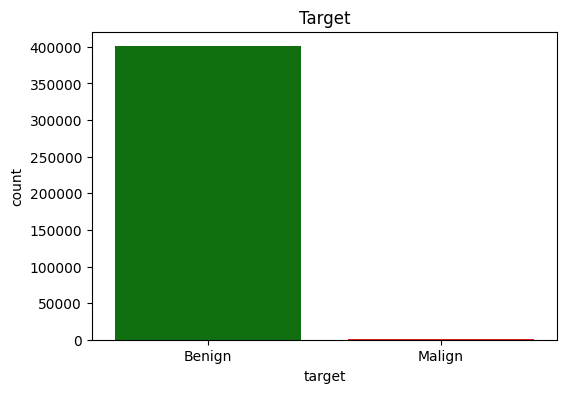

In [8]:
targets = df_raw.target.value_counts()
print(targets)

fig, ax = plt.subplots(figsize=(6,4))
plt.title('Target')
sns.countplot(data=df_raw, x='target', hue='target', palette=['green', 'red'], ax=ax)
ax.legend_.remove()
ax.set_xticks([0, 1])
ax.set_xticklabels(['Benign', 'Malign'])
plt.show()

The database is extremely imbalanced. There are much more benign cases than malign cases.

### Image size analysis for image scaling

In [8]:
# Method to determine the width or height of the images. Default is height (dim=0)
def get_size(file_name, dim=0):
    im = cv2.imread(file_name)
    if im is not None:
        if dim == 0:
            return im.shape[0]
        else:
            return im.shape[1]
    else:
        return None

df_raw['im_height'] = df_raw['isic_id'].apply(lambda x: get_size(os.path.join(image_path, x + ".jpg")))

In [9]:
# See the stats for the image size
print(df_raw.describe()['im_height'].round())
print("")
print(f"Mean:   {df_raw['im_height'].mean().round().astype(int)}")
print(f"Mode:   {df_raw['im_height'].mode()[0].round().astype(int)}")
print(f"Median: {df_raw['im_height'].median().round().astype(int)}")

count    401059.0
mean        133.0
std          18.0
min          41.0
25%         121.0
50%         131.0
75%         143.0
max         269.0
Name: im_height, dtype: float64

Mean:   133
Mode:   133
Median: 131


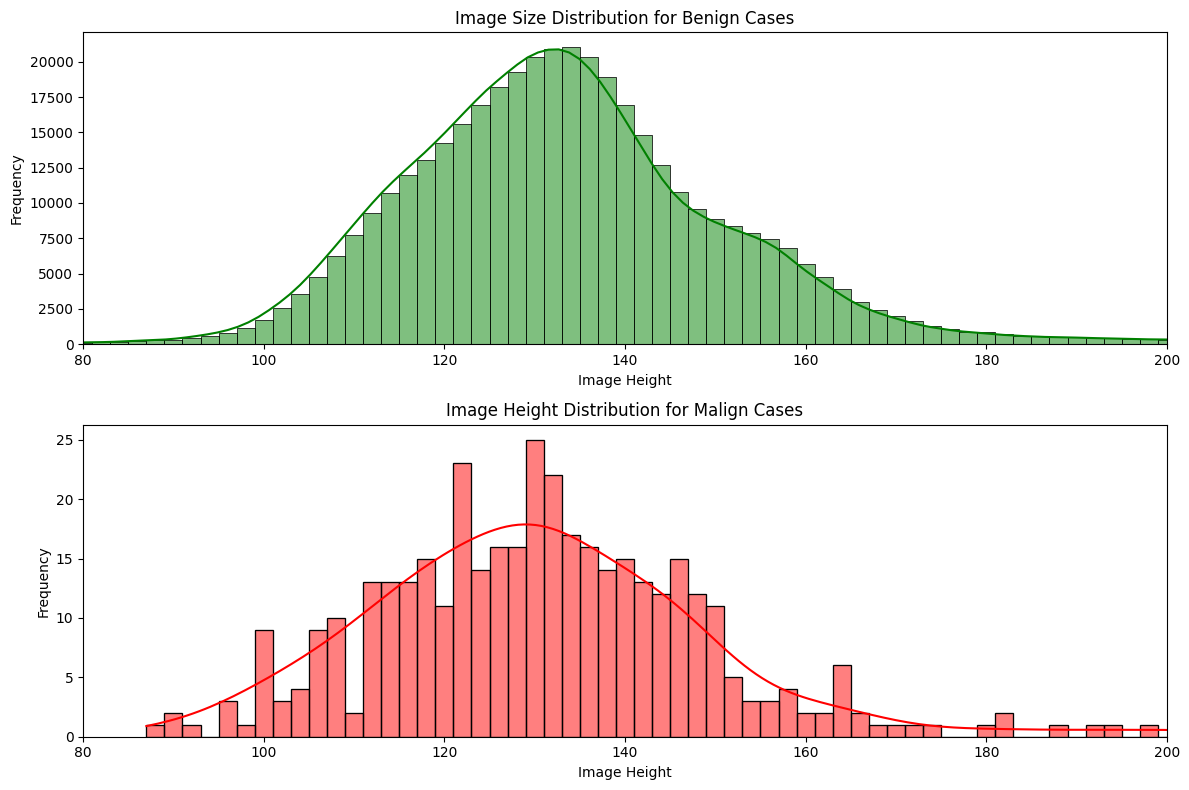

In [10]:
#Plot the image size distributions
fig = plt.figure(figsize=(12, 8))

# Subplot for benign cases
ax = fig.add_subplot(211)
ax.set_title('Image Size Distribution for Benign Cases')
sns.histplot(df_raw[df_raw.target == 0], x='im_height', binwidth=2, kde=True, ax=ax, color='green')
ax.set_xlabel('Image Height')
ax.set_ylabel('Frequency')

# Subplot for malignant cases
ax2 = fig.add_subplot(212)
ax2.set_title('Image Height Distribution for Malign Cases')
sns.histplot(df_raw[df_raw.target == 1], x='im_height', binwidth=2, kde=True, ax=ax2, color='red')
ax2.set_xlabel('Image Height')
ax2.set_ylabel('Frequency')

# Set the same x-axis range for both plots
ax.set_xlim(80, 200)
ax2.set_xlim(80, 200)

plt.tight_layout()
plt.show()

The most frequent values are around 133. This means that we can scale the training images to 133x133 pixels. We can however scale then to **128x128 pixels**, as it more typical for image processing.

### Removing irrelevant features

In [18]:
columns_to_be_dropped = ['lesion_id','iddx_full','iddx_1','iddx_2','iddx_3','iddx_4','iddx_5','mel_mitotic_index','mel_thick_mm','tbp_lv_dnn_lesion_confidence','patient_id','image_type','attribution','copyright_license']
df_dropped = df_raw.drop(columns=columns_to_be_dropped)

In [19]:
# Function to print NaN values only
def print_NaNs(df):
    nan_list = df.isna().sum()
    if nan_list.sum() == 0:
        print("The dataframe contains no NaN values")
    else:
        return nan_list[nan_list != 0]

print_NaNs(df_dropped)

age_approx              2798
sex                    11517
anatom_site_general     5756
dtype: int64

### Removing NaN values
Given the high number of benign cases, it would be possible simple to remove those raws with at least one NaN value. Howerve, it would also remove some malign cases. Due to the very low number of malign cases, it would be preferable to keep them. In such a case, we can replace the NaN values of ages with the **median**, thos of sex with the **mode**, and those of anatom_site_general can be removed as it is very difficult to estimate the region of the cancer.

In [21]:
# Replace and remove NaN values
imputer_age = KNNImputer(n_neighbors=5)
age_approx_reshaped = df_dropped[['age_approx']]
df_dropped['age_approx'] = imputer_age.fit_transform(age_approx_reshaped)
imputer_sex = KNNImputer(n_neighbors=5)
df_dropped['sex'] = df_dropped['sex'].apply(lambda x: 0 if x == 'male' else 1 if x == 'female' else np.NaN)
sex_reshaped = df_dropped[['sex']]
df_dropped['sex'] = imputer_sex.fit_transform(sex_reshaped)
df_dropped.dropna(subset=['anatom_site_general'], inplace=True)
print_NaNs(df_dropped)

# Determine how many cases have been removed
print(f"Number of samples before removing NaNs: {df_raw.shape[0]}")
print(f"Number of samples after removing NaNs:  {df_dropped.shape[0]}")
print(f"Data reduccion in percentage: {np.round(100 * (df_dropped.shape[0] - df_raw.shape[0]) / df_raw.shape[0], 1)}%")

targets_dropped = df_dropped.target.value_counts()
print(f"Targets before dropping:")
print(targets)
print(f"Targets before dropping:")
print(targets_dropped)

The dataframe contains no NaN values
Number of samples before removing NaNs: 401059
Number of samples after removing NaNs:  395303
Data reduccion in percentage: -1.4%
Targets before dropping:
0    400666
1       393
Name: target, dtype: int64
Targets before dropping:
0    394910
1       393
Name: target, dtype: int64


In [22]:
print_NaNs(df_dropped)

The dataframe contains no NaN values


### Converting data types

In [23]:
# Convert target, age, and tile_type into boolean (or int with 0 and 1)

# target
df_dropped['target'] = df_dropped['target'].astype(int)

# sex -> 0: male, 1: female
#df_dropped['sex'] = df_dropped['sex'].apply(lambda x: 0 if x == 'male' else 1)
df_dropped['sex'] = df_dropped['sex'].astype(int)

# tdb_tile_type -> 0: white, 1: XP
df_dropped['tbp_tile_type'] = df_dropped['tbp_tile_type'].apply(lambda x: 0 if x == '3D: white' else 1)
df_dropped['tbp_tile_type'] = df_dropped['tbp_tile_type'].astype(int)

In [24]:
df_dropped['tbp_tile_type'].value_counts()

1    281047
0    114256
Name: tbp_tile_type, dtype: int64

In [16]:
# Convert anatom_site_general, tbp_lv_location, and tbp_lv_location_simple into categorical

df_dropped['anatom_site_general'] = pd.Categorical(df_dropped['anatom_site_general'])
df_dropped['tbp_lv_location'] = pd.Categorical(df_dropped['tbp_lv_location'])
df_dropped['tbp_lv_location_simple'] = pd.Categorical(df_dropped['tbp_lv_location_simple'])

In [17]:
df_dropped.dtypes

isic_id                          object
target                            int32
age_approx                      float64
sex                               int32
anatom_site_general            category
clin_size_long_diam_mm          float64
tbp_tile_type                     int32
tbp_lv_A                        float64
tbp_lv_Aext                     float64
tbp_lv_B                        float64
tbp_lv_Bext                     float64
tbp_lv_C                        float64
tbp_lv_Cext                     float64
tbp_lv_H                        float64
tbp_lv_Hext                     float64
tbp_lv_L                        float64
tbp_lv_Lext                     float64
tbp_lv_areaMM2                  float64
tbp_lv_area_perim_ratio         float64
tbp_lv_color_std_mean           float64
tbp_lv_deltaA                   float64
tbp_lv_deltaB                   float64
tbp_lv_deltaL                   float64
tbp_lv_deltaLB                  float64
tbp_lv_deltaLBnorm              float64


### Applying columns transformers

In [18]:
# Apply scaling from 0 to 1 to those features associated with scores

# df_dropped['tbp_lv_nevi_confidence'] = df_dropped['tbp_lv_nevi_confidence'].apply(lambda x: x / 100)
# df_dropped['tbp_lv_norm_border'] = df_dropped['tbp_lv_norm_border'].apply(lambda x: x / 10)
# df_dropped['tbp_lv_norm_color'] = df_dropped['tbp_lv_norm_color'].apply(lambda x: x / 10)
# df_dropped['tbp_lv_radial_color_std_max'] = df_dropped['tbp_lv_radial_color_std_max'].apply(lambda x: x / 10)
# df_dropped['tbp_lv_symm_2axis'] = df_dropped['tbp_lv_symm_2axis'].apply(lambda x: x / 10)

In [19]:
# Distribution analysis

num_features = list(df_dropped.columns[(df_dropped.dtypes != object) & (df_dropped.dtypes != 'category')])
num_features.remove('target')
def plot_num(df, feature, label=''):
    feature = label + feature
    fig = plt.figure(figsize=(10,2))
    axes = fig.add_subplot(121)    
    #,axes=plt.subplots(1,2)    
    sns.boxplot(data=df, x=feature, ax=axes)    
    #plt.xlabel(units)  
    axes = fig.add_subplot(122)
    sns.histplot(data=df, x=feature, ax=axes, color='#D0312D', kde=True)
    #plt.xlabel(units)
    fig.set_size_inches(10, 2)
    #plt.suptitle(label + feature)  # Adds a title to the entire figure
    plt.show()

def plot_num_comp(df1, df2, feature, label1='', label2=''):
    feature1 = label1 + feature
    feature2 = label2 + feature
    fig = plt.figure(figsize=(20,2))
    axes = fig.add_subplot(141)    
    #,axes=plt.subplots(1,2)    
    sns.boxplot(data=df1, x=feature1, ax=axes)    
    #plt.xlabel(units)  
    axes = fig.add_subplot(142)
    sns.histplot(data=df1, x=feature1, ax=axes, color='#D0312D', kde=True)
    #plt.xlabel(units)
    axes = fig.add_subplot(143)    
    #,axes=plt.subplots(1,2)    
    sns.boxplot(data=df2, x=feature2, ax=axes)    
    #plt.xlabel(units)  
    axes = fig.add_subplot(144)
    sns.histplot(data=df2, x=feature2, ax=axes, color='green', kde=True)
    #plt.xlabel(units)
    fig.set_size_inches(20, 2)
    #plt.suptitle(label + feature)  # Adds a title to the entire figure
    plt.show()

#for idx, column in enumerate(num_features):
#    plot_num(df_dropped, column)

These plots show that many data distributions are right and left skewed. Transformation is needed. Other features do not neee to be transformed, for example, coordinates, or even features with negative values.

In [20]:
# This fuction applies, for each feature, different transforms for correcting skeweness and returns
# a dataframe with the results. Ideally a data distribution should have a skewness score close to 0.
# Good skeness score are around +- 0.5
def analyze_skewness(df):

    # Obtain the list of the column names
    num_features = list(df.columns[(df.dtypes != object) & (df.dtypes != 'category')])
    num_features.remove('target')
    
    # Define the number of rows and columns
    num_rows = len(num_features)
    columns = ['Feature', 'ORIG', 'LOG', 'EXP', 'SQR', 'RSQR']

    # Initialize the dataframe with zeros
    df_stats = pd.DataFrame(np.zeros((num_rows, len(columns))), columns=columns)

    # Loop over features
    for idx, feature in enumerate(num_features):

        tr_log = ColumnTransformer(transformers=[("log", FunctionTransformer(np.log1p), [feature])])
        tr_exp = ColumnTransformer(transformers=[("exp", FunctionTransformer(np.exp), [feature])])                
        tr_sqr = ColumnTransformer(transformers=[("sqr", FunctionTransformer(np.square), [feature])])    
        #tr_cube = ColumnTransformer(transformers=[("cube", FunctionTransformer(lambda x: x**3), [feature])])
        tr_sqrt = ColumnTransformer(transformers=[("sqrt", FunctionTransformer(np.sqrt), [feature])])
        #tr_bxx = ColumnTransformer(transformers=[("bxx", FunctionTransformer(add_one_and_boxcox), [feature])])
    
        df_log = pd.DataFrame(tr_log.fit_transform(df))
        df_exp = pd.DataFrame(tr_exp.fit_transform(df))
        df_sqr = pd.DataFrame(tr_sqr.fit_transform(df))
        df_sqrt = pd.DataFrame(tr_sqrt.fit_transform(df))
        #df_bxx = pd.DataFrame(tr_bxx.fit_transform(df))
        
        df_stats.iloc[idx,0] = feature
        df_stats.iloc[idx,1] = round(df[feature].skew(),1)
        df_stats.iloc[idx,2] = round(df_log.skew()[0],1)
        df_stats.iloc[idx,3] = round(df_exp.skew()[0],1)
        df_stats.iloc[idx,4] = round(df_sqr.skew()[0],1)
        df_stats.iloc[idx,5] = round(df_sqrt.skew()[0],1)
        #df_stats.iloc[idx,6] = round(df_bxx.skew()[0],1)

    return pd.DataFrame(df_stats).set_index('Feature')

In [27]:
analyze_skewness(df_dropped)

,ORIG,LOG,EXP,SQR,RSQR
Feature,,,,,
age_approx,-0.3,-1.1,6.6,0.3,-0.6
sex,0.8,0.8,0.8,0.8,0.8
clin_size_long_diam_mm,2.8,1.4,457.6,6.6,1.9
tbp_tile_type,-0.9,-0.9,-0.9,-0.9,-0.9
tbp_lv_A,0.6,-0.2,449.1,1.6,0.1
tbp_lv_Aext,0.4,-0.3,340.7,1.3,0.0
tbp_lv_B,0.2,-0.5,545.2,0.8,-0.1
tbp_lv_Bext,0.3,-0.2,171.1,0.9,0.1
tbp_lv_C,0.1,-0.5,151.9,0.6,-0.2


In [22]:
# According to the above table, the following features require log transform and square transform to correct skewness.
# Note that the features with negative values will not be transformed in order not to loose information (negative sign)
features_to_be_logtr = ['clin_size_long_diam_mm',
                        'tbp_lv_areaMM2',
                        'tbp_lv_area_perim_ratio',
                        'tbp_lv_color_std_mean',
                        'tbp_lv_deltaLB',
                        'tbp_lv_deltaLBnorm',
                        'tbp_lv_minorAxisMM',
                        'tbp_lv_norm_border',
                        'tbp_lv_norm_color',
                        'tbp_lv_perimeterMM',
                        'tbp_lv_radial_color_std_max',
                        'tbp_lv_stdL',
                        'tbp_lv_stdLExt',
                        'tbp_lv_symm_2axis']
features_to_be_sqrtr = ['tbp_lv_eccentricity']

# Let's apply
df_log_features = df_dropped[features_to_be_logtr].apply(lambda x : np.log1p(x))
df_sqr_features = df_dropped[features_to_be_sqrtr].apply(lambda x : np.square(x))

# Modify the column names
df_log_features.columns = ['log_' + col for col in features_to_be_logtr]
df_sqr_features.columns = ['sqr_' + col for col in features_to_be_sqrtr]

# Merge dataframe
df_dropped_log_sqr_corr = pd.concat([df_log_features, df_sqr_features], axis=1)

In [23]:
# Visualize the processed data with log and sqr
#for idx, column in enumerate(features_to_be_logtr):
#    plot_num_comp(df_dropped, df_dropped_log_sqr_corr, column, label2='log_')
#for idx, column in enumerate(features_to_be_sqrtr):
#    plot_num_comp(df_dropped, df_dropped_log_sqr_corr, column, label2='sqr_')

Although some data distributions still remain a bit skewed after log and sqrt transformations, the distributions are more symetric. It is also observed that the tails of the distributions are very long (kurtosis > 0).

In [24]:
# Final dataframe

df_eda = pd.concat([df_dropped, df_dropped_log_sqr_corr], axis=1)
df_eda = df_eda.reset_index(drop=True)
print(f"Colums df_dropped: {df_dropped.shape[1]}")
print(f"Colums df_dropped_log_sqr_cor: {df_dropped_log_sqr_corr.shape[1]}")
print(f"Colums df_eda: {df_eda.shape[1]}")

#df_dropped.to_csv("train-metadata-eda.csv")
#df_eda.to_csv("train-metadata-eda.csv", index=False)

Colums df_dropped: 41
Colums df_dropped_log_sqr_cor: 15
Colums df_eda: 56


In [25]:
from sklearn.preprocessing import RobustScaler

df1 = df_log_features
df2 = df_dropped[features_to_be_logtr]

df1_scaler = RobustScaler()
df1_scaled = pd.DataFrame(df1_scaler.fit_transform(df1), columns=df1.columns)

df2_scaler = RobustScaler()
df2_scaled = pd.DataFrame(df2_scaler.fit_transform(df2), columns=df2.columns)

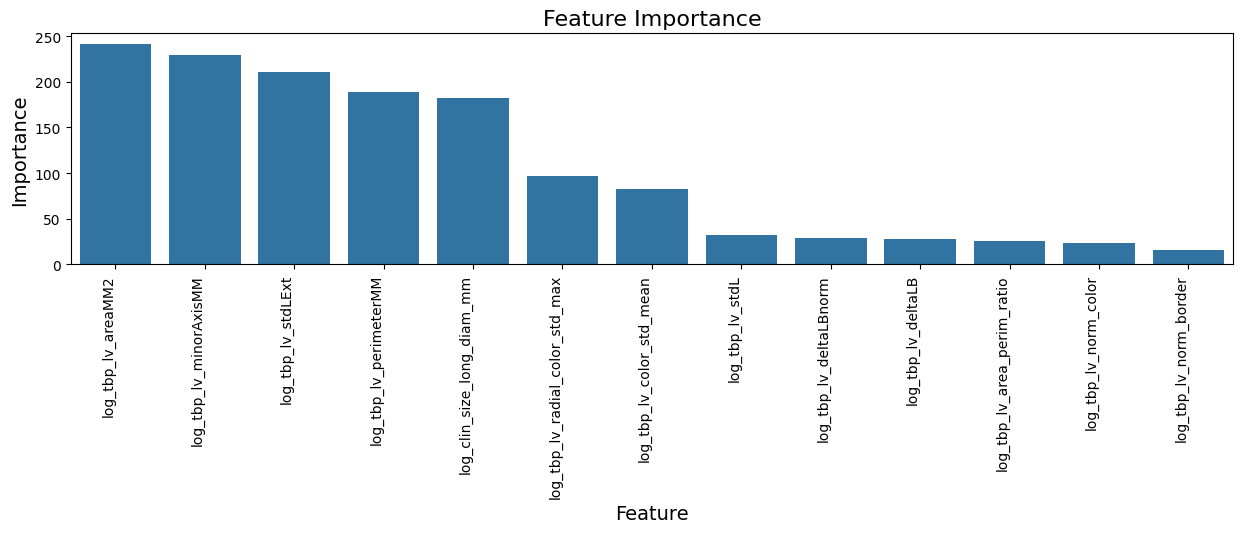

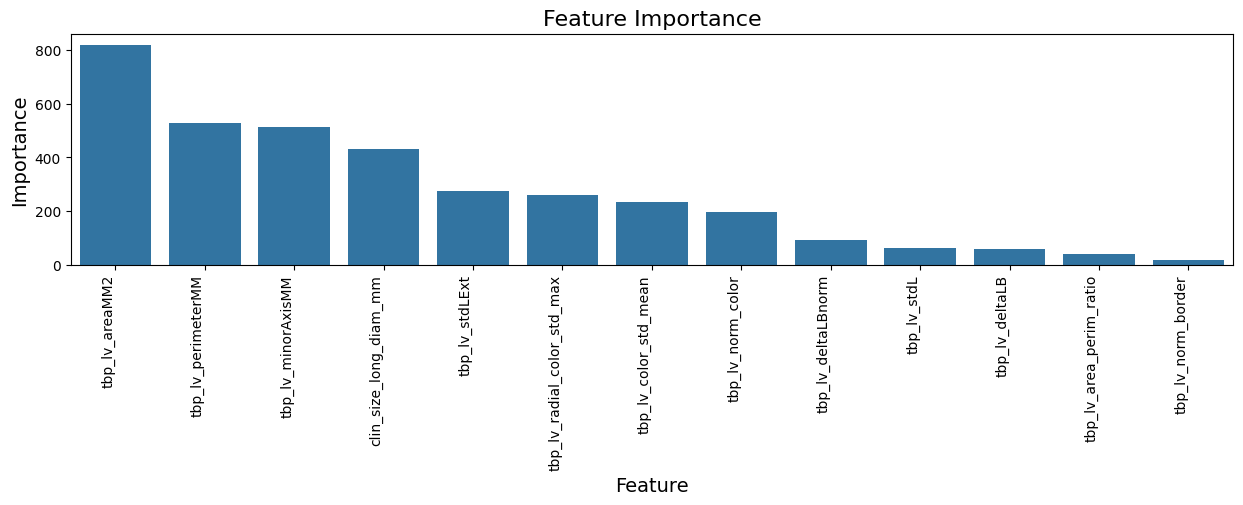

In [26]:
# Use SelectKBest (f_classif) for numerical features
Kbest_numerical = SelectKBest(score_func=f_classif, k='all')
Kbest_numerical.fit(df1_scaled, df_dropped.target)

# Extract feature scores and p-values
scores = Kbest_numerical.scores_
pvalues = Kbest_numerical.pvalues_

# Create a DataFrame to save feature names, scores, and p-values
feature_scores = pd.DataFrame({
    'Feature': df1.columns,
    'Score': scores,
    'P-Value': pvalues
})

# Sort features by 'Score'
best_feature_scores = feature_scores[feature_scores['P-Value'] < 0.05]
sorted_features = best_feature_scores.sort_values(by='Score', ascending=False)

# Display the sorted features
KBEST_NUM = sorted_features.shape[0]
#print(f"Number of relevant numerical features: {KBEST_NUM}\n")
#print(sorted_features.set_index('Feature'))

best_numerical_features = sorted_features.index.tolist()

# Plot feature importance
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot()
sns.barplot(x='Feature', y='Score', data=sorted_features, ax=ax)
plt.xticks(rotation=90, ha='right')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
#plt.tight_layout()
plt.show()


# Use SelectKBest (f_classif) for numerical features
Kbest_numerical = SelectKBest(score_func=f_classif, k='all')
Kbest_numerical.fit(df2_scaled, df_dropped.target)

# Extract feature scores and p-values
scores = Kbest_numerical.scores_
pvalues = Kbest_numerical.pvalues_

# Create a DataFrame to save feature names, scores, and p-values
feature_scores = pd.DataFrame({
    'Feature': features_to_be_logtr,
    'Score': scores,
    'P-Value': pvalues
})

# Sort features by 'Score'
best_feature_scores = feature_scores[feature_scores['P-Value'] < 0.05]
sorted_features = best_feature_scores.sort_values(by='Score', ascending=False)

# Display the sorted features
KBEST_NUM = sorted_features.shape[0]
#print(f"Number of relevant numerical features: {KBEST_NUM}\n")
#print(sorted_features.set_index('Feature'))

best_numerical_features = sorted_features.index.tolist()

# Plot feature importance
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot()
sns.barplot(x='Feature', y='Score', data=sorted_features, ax=ax)
plt.xticks(rotation=90, ha='right')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
#plt.tight_layout()
plt.show()
